<a href="https://colab.research.google.com/github/asma-h99/Univariate-Linear-Regression-/blob/main/univariate_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b

In [ ]:
data =pd.read_csv('/content/dataset.csv')


In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state = 2)

In [ ]:
X_train, x_cv, Y_train, y_cv = train_test_split(X_train,Y_train,test_size = 0.25,train_size =0.75)

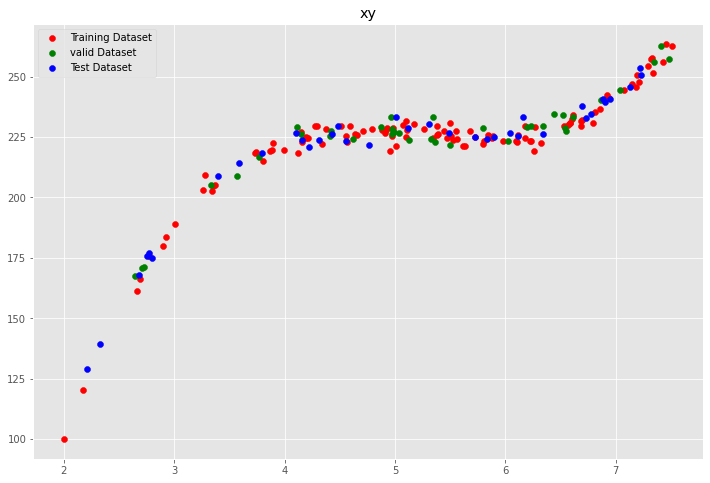

In [ ]:

# Plot training data.
plt.scatter(X_train, Y_train, label='Training Dataset',color='red')
plt.scatter(x_cv, y_cv, label='valid Dataset',color='green')
plt.scatter(X_test, Y_test, label='Test Dataset',color='blue')


plt.title('xy')
plt.legend()
plt.show()

In [ ]:
def cost_function(X,y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    return 1/(2*m) * np.sum(error)

In [ ]:
m = data.x.values.size
X = np.append(np.ones((m,1)),data.x.values.reshape(m, 1),axis = 1)
y= data.y.values.reshape(m,1)
theta = np.zeros((2,1))
cost_function(X,y,theta)

25092.709429507486

In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta -= alpha * 1/m  * error
        costs.append(cost_function(X,y,theta))

    return theta,costs


In [ ]:
theta,costs = gradient_descent(X,y,theta,alpha=0.02, iterations=1000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = 109.95 + 21.03x1


In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i],theta_1[j]])
        cost_values[i,j] =cost_function(X,y,t)


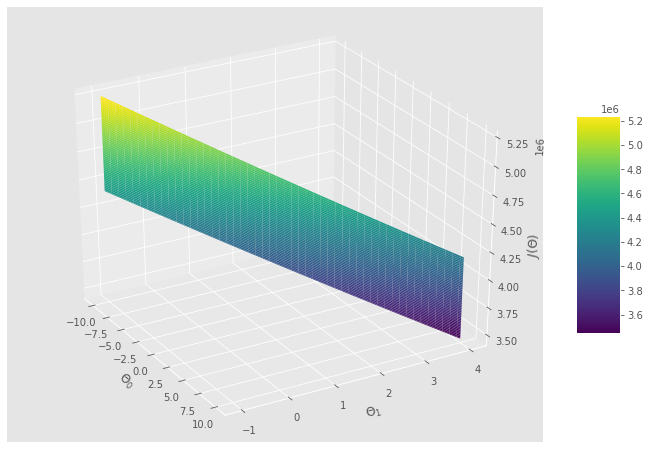

In [ ]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)
plt.show()

Text(0.5, 1.0, 'Values of Cost Function')

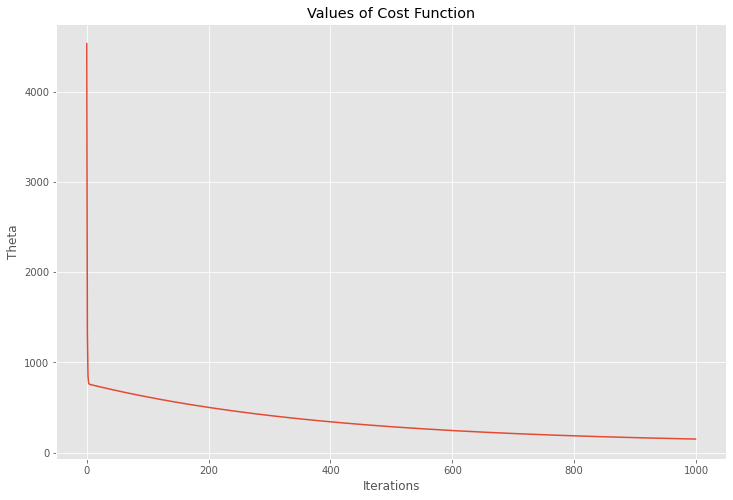

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Theta')
plt.title('Values of Cost Function')

In [ ]:
theta

array([[109.95478126],
       [ 21.03256415]])

In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [ ]:


model.fit(X_train, Y_train)

In [ ]:
test_data_prediction = model.predict(X_test)

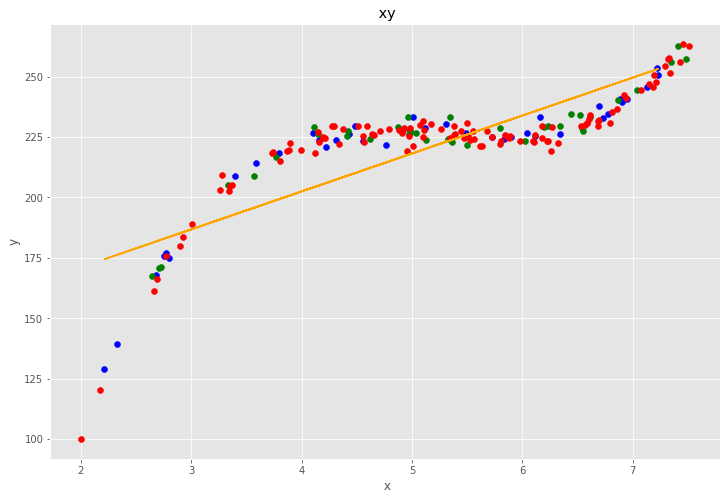

In [ ]:


plt.scatter(X_test, Y_test, color = 'blue')
plt.scatter(x_cv, y_cv, color = 'green')
plt.scatter(X_train, Y_train, color = 'red')

plt.plot(X_test, test_data_prediction, color='orange')
plt.xlabel(' x')
plt.ylabel('y')
plt.title(' xy')
plt.show()

In [ ]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array([1,4]),theta)*10000
print(y_pred_1)

[1940850.37875072]
